Nov 19, 2020
Please refer to link
http://derekgreene.com/slides/topic-modelling-with-scikitlearn.pdf

1. take out the description of one app as document


In [1]:
import pandas as pd
%run -i '0_paths.py'
initial_panel = '201908'
folder_name = initial_panel + '_PANEL_DF'
f_name = 'description_converted_to_spacy_tokens.pkl'
q = input_path / '__PANELS__' / folder_name / f_name
TDF = pd.read_pickle(q)
TDF.head(n=10)
documents = TDF.iloc[3, 1]
documents

['penup',
 'creative',
 'sns',
 'base',
 'pen',
 'generate',
 'image',
 'share',
 'imagination',
 'global',
 'creative',
 'minds.\\n[main',
 'features]\\n-',
 'drawing',
 'draw',
 'easily',
 'comfortably\\n-',
 'coloring',
 'color',
 'beautiful',
 'sketches\\n-',
 'live',
 'draw',
 'foster',
 'draw',
 'skill',
 'set',
 'follow',
 'draw',
 'video\\n-',
 'photo',
 'drawing',
 'draw',
 'photos\\n-',
 'challenge',
 'challenge',
 'new',
 'topics\\n-',
 'popular',
 'enjoy',
 'real',
 'time',
 'popular',
 'artwork',
 'share',
 'drawings\\n-',
 'drawing',
 'comment',
 'express',
 'drawing',
 'fun',
 'manner',
 'interact',
 'another\\n-------------------------------------------------regarde',
 'app',
 'access',
 'privilege--------------------------------------\\nthe',
 'follow',
 'permission',
 'require',
 'app',
 'service',
 'optional',
 'permission',
 'default',
 'functionality',
 'service',
 'turn',
 'allowed.\\n[mandatory',
 'access',
 'privilege]\\n-',
 'contact',
 'account',
 'information

In [2]:
# please refer to topic_modeling.pdf from dissertation/topic_modeling folder
# Our output, A, is a sparse NumPy 2D array with rows corresponding to documents and
# columns corresponding to terms.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_A = CountVectorizer()
A = vectorizer_A.fit_transform(documents)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_B = TfidfVectorizer()
B = vectorizer_B.fit_transform(documents)

In [5]:
terms_A = vectorizer_A.get_feature_names()
print("Vocabulary A has %d distinct terms" % len(terms_A))
print(terms_A)

terms_B = vectorizer_B.get_feature_names()
print("Vocabulary B has %d distinct terms" % len(terms_B))
print(terms_B)

Vocabulary A has 84 distinct terms
['access', 'account', 'allow', 'allowed', 'android', 'another', 'app', 'artwork', 'base', 'beautiful', 'challenge', 'color', 'coloring', 'comfortably', 'comment', 'configure', 'contact', 'creative', 'default', 'device', 'download', 'draw', 'drawing', 'drawings', 'easily', 'enjoy', 'express', 'facebook', 'features', 'follow', 'foster', 'fun', 'functionality', 'generate', 'global', 'google', 'image', 'imagination', 'information', 'interact', 'live', 'low', 'main', 'mandatory', 'manner', 'menu', 'minds', 'new', 'nif', 'npreviously', 'nthe', 'optional', 'pen', 'penup', 'permission', 'permissions', 'photo', 'photos', 'popular', 'privilege', 'real', 'regarde', 'require', 'reset', 'samsung', 'service', 'set', 'setting', 'share', 'sign', 'sketches', 'skill', 'sns', 'software', 'storage', 'system', 'time', 'topics', 'turn', 'twitt', 'update', 'upload', 'version', 'video']
Vocabulary B has 84 distinct terms
['access', 'account', 'allow', 'allowed', 'android', '

In [6]:
print('this is from A, count vectorizer')
print(A)
print('this is from B, tfid vectorizer')
print(B)

this is from A, count vectorizer
  (0, 53)	1
  (1, 17)	1
  (2, 72)	1
  (3, 8)	1
  (4, 52)	1
  (5, 33)	1
  (6, 36)	1
  (7, 68)	1
  (8, 37)	1
  (9, 34)	1
  (10, 17)	1
  (11, 46)	1
  (11, 42)	1
  (12, 28)	1
  (13, 22)	1
  (14, 21)	1
  (15, 24)	1
  (16, 13)	1
  (17, 12)	1
  (18, 11)	1
  (19, 9)	1
  (20, 70)	1
  (21, 40)	1
  (22, 21)	1
  (23, 30)	1
  :	:
  (87, 53)	1
  (88, 20)	1
  (89, 22)	1
  (90, 53)	1
  (90, 48)	1
  (91, 75)	1
  (92, 73)	1
  (93, 82)	1
  (94, 41)	1
  (95, 4)	1
  (97, 80)	1
  (98, 73)	1
  (99, 15)	1
  (100, 6)	1
  (101, 55)	1
  (101, 49)	1
  (102, 2)	1
  (103, 54)	1
  (104, 63)	1
  (105, 6)	1
  (106, 45)	1
  (107, 19)	1
  (108, 67)	1
  (109, 73)	1
  (110, 80)	1
this is from B, tfid vectorizer
  (0, 53)	1.0
  (1, 17)	1.0
  (2, 72)	1.0
  (3, 8)	1.0
  (4, 52)	1.0
  (5, 33)	1.0
  (6, 36)	1.0
  (7, 68)	1.0
  (8, 37)	1.0
  (9, 34)	1.0
  (10, 17)	1.0
  (11, 42)	0.7071067811865476
  (11, 46)	0.7071067811865476
  (12, 28)	1.0
  (13, 22)	1.0
  (14, 21)	1.0
  (15, 24)	1.0
  (16, 13

look at the terms with the highest TF-IDF scores across all documents
in the document-term matrix.
We can define such a function as follows:

In [7]:
import operator
def rank_terms( A, terms_A ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms_A):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)


ranking = rank_terms( B, terms_B )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. drawing (6.00)
02. draw (5.00)
03. app (4.00)
04. penup (3.63)
05. access (3.00)
06. permission (3.00)
07. software (3.00)
08. account (2.68)
09. privilege (2.65)
10. challenge (2.00)
11. creative (2.00)
12. follow (2.00)
13. popular (2.00)
14. service (2.00)
15. share (2.00)
16. update (2.00)
17. optional (1.73)
18. allow (1.00)
19. android (1.00)
20. artwork (1.00)


In [9]:
# interesting way to save several things at the same time
import pickle
folder_name = initial_panel + '_PANEL_DF'
f_name = 'playground_app_description_tfid_vectorized.pkl'
q = input_path / '__PANELS__' / folder_name / f_name
with open(q, "wb") as f:
    pickle.dump((B,terms_B,documents), f)

with open(q, "rb") as f:
    B, terms_B, documents = pickle.load(f)

https://github.com/derekgreene/topic-model-tutorial/blob/master/2%20-%20NMF%20Topic%20Models.ipynb

The key input parameter to NMF is the number of topics to generate k. For the moment,
we will pre-specify a guessed value, for demonstration purposes.

In [8]:
k = 5
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k )
# apply the model and extract the two factor matrices
W = model.fit_transform( B )
H = model.components_

NMF produces to factor matrices as its output: W and H.

The W factor contains the document membership weights relative to
each of the k topics. Each row corresponds to a single document,
and each column correspond to a topic.
(我觉得这里的 document 指的是一个单词)

In [9]:
W.shape

(111, 5)

we can see it is strongly associated with one (the fourth) topic.
However, each document can
be potentially associated with multiple topics to different degrees.

In [10]:
W[0,:].round(2)

array([0.  , 0.  , 0.  , 0.72, 0.  ])

The H factor contains the term weights relative to each of the k topics.
In this case, each row corresponds to a topic,
and each column corresponds to a unique term in the corpus vocabulary.

In [11]:
H.shape

(5, 84)

check whether a term is associated with a single topic or multiple topics.

In [12]:
print(terms_B)
term_index = terms_B.index('app')
print(H[:,term_index].round(3))
term_index = terms_B.index('draw')
print(H[:,term_index].round(3))

['access', 'account', 'allow', 'allowed', 'android', 'another', 'app', 'artwork', 'base', 'beautiful', 'challenge', 'color', 'coloring', 'comfortably', 'comment', 'configure', 'contact', 'creative', 'default', 'device', 'download', 'draw', 'drawing', 'drawings', 'easily', 'enjoy', 'express', 'facebook', 'features', 'follow', 'foster', 'fun', 'functionality', 'generate', 'global', 'google', 'image', 'imagination', 'information', 'interact', 'live', 'low', 'main', 'mandatory', 'manner', 'menu', 'minds', 'new', 'nif', 'npreviously', 'nthe', 'optional', 'pen', 'penup', 'permission', 'permissions', 'photo', 'photos', 'popular', 'privilege', 'real', 'regarde', 'require', 'reset', 'samsung', 'service', 'set', 'setting', 'share', 'sign', 'sketches', 'skill', 'sns', 'software', 'storage', 'system', 'time', 'topics', 'turn', 'twitt', 'update', 'upload', 'version', 'video']
[0.    0.    1.414 0.    0.   ]
[0.    1.495 0.    0.    0.   ]


The top ranked terms from the H factor for each topic can give us an insight
into the content of that topic. This is often called the topic descriptor.
Let's define a function that extracts the descriptor for a specified topic:

In [13]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms


In [14]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms_B, H, topic_index, 3 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: drawing, account, optional
Topic 02: draw, account, optional
Topic 03: app, account, optional
Topic 04: penup, nif, software
Topic 05: access, permission, account


The rankings above do not show the strength of association for the
different terms. We can represent the distribution of the weights
for the top terms in a topic using a matplotlib horizontal bar chart.

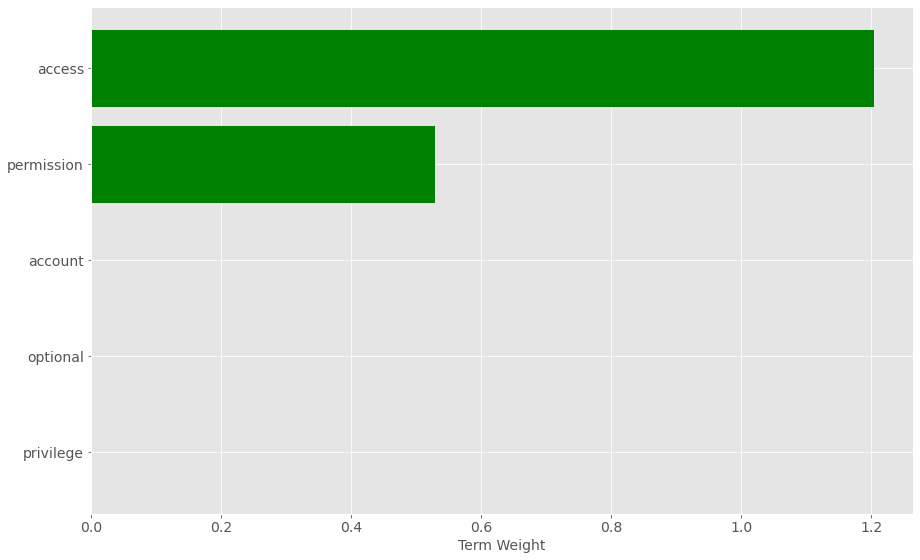

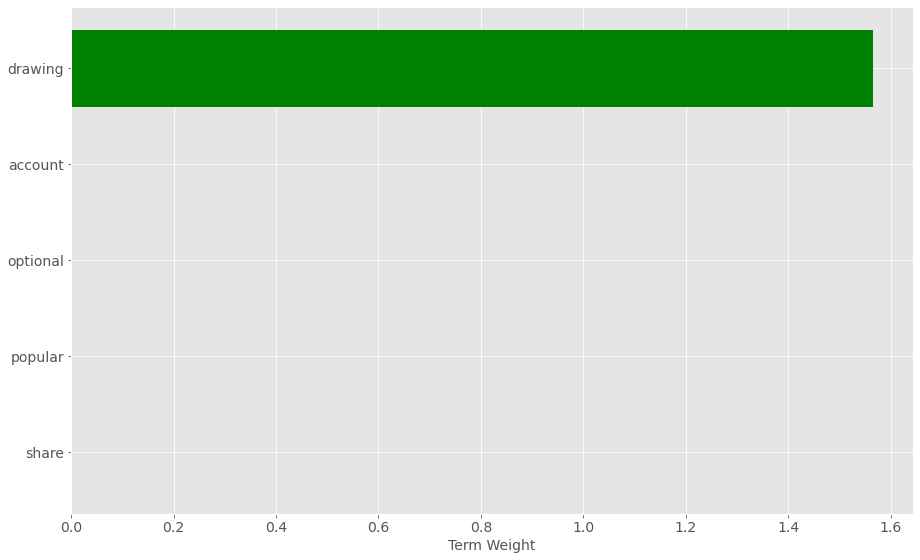

In [15]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

So for instance, for the 5th topic we can generate a plot with the
top 5 terms using:

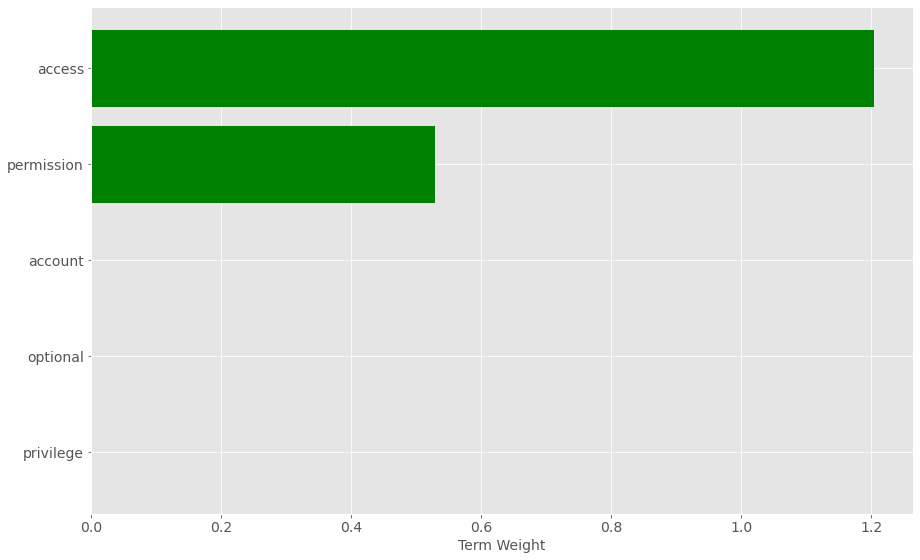

In [16]:
plot_top_term_weights( terms_B, H, 4, 5 )

So for instance, for the first topic we can generate a plot with the
top 5 terms using:

In [ ]:
plot_top_term_weights( terms_B, H, 0, 5 )

We can also look at the snippets for the top-ranked documents for each topic.
We'll define a function to produce this ranking also.

In [19]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

01. drawing
02. drawing
03. drawing
04. drawing
05. drawing
06. drawing
07. software
08. software
09. software
10. privilege]\n-


For instance, for the first topic listed above, the top 10 documents are:

In [ ]:
topic_snippets = get_top_snippets( documents, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

for the second topic listed above, the top 10 documents are:

In [21]:
topic_snippets = get_top_snippets( documents, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

topic_snippets = get_top_snippets( documents, W, 2, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. draw
02. draw
03. draw
04. draw
05. draw
06. software
07. software
08. software
09. account\n[optional
10. account
01. app
02. app
03. app
04. app
05. privilege]\n-
06. privilege]\n-
07. privilege--------------------------------------\nthe
08. account\n[optional
09. account
10. account


In [1]:
# Dec 04, 2020, I decide to compare the topic words generated from LDA and NMF
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 0.879s.
Extracting tf-idf features for NMF...
done in 0.188s.
Extracting tf features for LDA...
done in 0.183s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.162s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp m

# NMF MODEL

In [3]:
# test topic modeling of app descriptions using both NMF and LDA
# 1. open tokenized document, a sub-sample of all tokens for all apps (panels combined)
%run -i '0_paths.py'
%run -i '4_natural_language_processing.py'
initial_panel = '201908'
panels_have_text = ['201912', '202001', '202003', '202004', '202009', '202010', '202011']
doc = combine_all_tokens_into_single_document(initial_panel, panels_have_text)
print(len(doc))
doc_sample = random.sample(doc, k = 10000)
print(len(doc_sample))


14911725
10000


In [16]:
# test topic modeling of app descriptions using both NMF and LDA
# 2. TF-IDF (Term Frequency Inverse Document Frequency)
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# instantiate the vectorizer object
# since I have already tokenized, removed stop words and lemmatized in SpaCy,
# so I can save (analyzer= 'word', stop_words='english') inside the CountVectorizer brackets
tfidfvectorizer = TfidfVectorizer()
tfidf_wm = tfidfvectorizer.fit_transform(doc_sample)
print(tfidfvectorizer.get_feature_names())
# from the printing above, at least I observe the tokenized words are exactly same for
# countvertorizer and tfidfvectorizer

['00', '000', '009688', '10', '100', '1050', '12', '120', '123', '13', '14', '15', '159', '1600x2560', '18', '180', '1865w', '19', '1908', '192', '1920x1920', '1939', '1980', '199', '1v1', '1x1', '20', '200', '2006', '2010', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '21', '2150', '2160', '2165', '22', '2250', '24', '25', '2525', '257x', '2580', '27', '285x', '29', '2950', '2ce', '2d', '2elegant', '2nd', '30', '305x', '30teams', '31', '32', '327', '3300', '331x', '347x', '36', '360', '37', '38', '3d', '3gp', '3gpp', '3opib9bggiu', '40', '4000', '4096', '45', '46', '48', '4k', '4v4', '4x4', '50', '50hz', '512', '52', '576', '60', '600', '65', '75', '777', '80', '80000', '800p', '866', '8c', '8hz', '90', '91058', '99', 'aaa', 'aac', 'aap', 'ability', 'able', 'abraham', 'absolutely', 'abstract', 'abundance', 'abundant', 'ac3', 'academic', 'accent', 'access', 'accessible', 'accessory', 'accompaniment', 'accompany', 'accordance', 'account', 'accurate', 'accuweather', 'acerca', 

https://shravan-kuchkula.github.io/topic-modeling/#vectorize-the-reviews
### Non-Negative Matrix Factorization (NMF)
The goal of NMF is to find two non-negative matrices (W, H) whose product approximates
the non- negative matrix X. This factorization can be used for example for
dimensionality reduction, source separation or topic extraction.

In [22]:
# test topic modeling of app descriptions using both NMF and LDA
# 3. create models
# k is number of topics
k = 100
# random_state ensures that everytime you run this line it will spit out exactly same results

nmf = NMF(n_components=k, random_state=1,
          alpha=.1, l1_ratio=.5)
nmf_output = nmf.fit_transform(tfidf_wm)
nmf_weights = nmf.components_
nmf_feature_names = tfidfvectorizer.get_feature_names()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
### 4. print top ranked topic words
print(nmf_output)
topic_index = 1
print(nmf_output[topic_index,:])
# np.argsort return the index of the item in the numpy array, not the actual value.
top_indices = np.argsort( nmf_output[topic_index,:] ) # ascending
print(top_indices)
top_indices = np.argsort( nmf_output[topic_index,:] )[::-1] # descending
print(top_indices)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[ 0 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 73 51
 74 76 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 75
 50 49 48 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1
 22 23 24 25 47 46 45 44 43 42 41 40 39 38 98 37 35 34 33 32 31 30 29 28
 27 26 36 99]
[99 36 26 27 28 29 30 31 32 33 34 35 37 98 38 39 40 41 42 43 44 45 46 47
 25 24 23 22  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 48 49 50 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 76 74 

# LDA MODEL

In [27]:
### 1. open document
# start with LDA model, NMF model does not seem to produce good results
# https://shravan-kuchkula.github.io/topic-modeling/#nmf-results-summary
%run -i '4_natural_language_processing.py'
initial_panel = '201908'
panels_have_text = ['201912', '202001', '202003', '202004', '202009', '202010', '202011']
DF = combine_tokenized_cols_into_single_col(initial_panel, panels_have_text)
documents = DF.loc[DF.index[102], 'combined_panels_description']
print(documents)
print(len(documents))


['wheel', 'legendary', 'gt', 'car', 'begin', 'enjoy', 'car', 'driver', 'simulator', 'car', 'game', '2018', 'use', 'nitro', 'booster', 'boost', 'gt', 'car', 'speed', 'drive', 'fast', 'fast', 'forget', 'know', 'racing', 'hit', 'gas', 'feed', 'passion', 'speed', 'car', 'parking', 'racing', 'adventure', 'extreme', 'speed', 'stunt', 'hero', 'impossible', 'car', 'stunt', 'race', 'professional', 'driver', 'stunt', 'car', 'track', '3d', 'race', 'crazy', 'gt', 'speed', 'car', 'impossible', 'race', 'track', 'go', 'amazing', 'experience.\\nthe', 'fantastic', 'amazing', 'crazy', 'car', 'stunt', 'stunt', 'track', 'blow', 'mind', 'crazy', 'smart', 'gt', 'car', 'smashing', 'machine', 'super', 'smart', 'drive', 'stunt', 'environment', 'make', 'game', 'interesting', 'extreme', 'city', 'gt', 'car', 'stunt', 'thrilling', 'game', 'car', 'racing', '2018', 'need', 'extreme', 'stunt', 'car', 'driving', 'skill', 'drive', 'safely', 'tricky', 'impossible', 'race', 'track', 'curvy', 'path', 'feel', 'like', 'rea

In [33]:
### 2. count vectorize
countvectorizer = CountVectorizer()
feature_matrix = countvectorizer.fit_transform(documents)
lda_feature_names = countvectorizer.get_feature_names()
print(lda_feature_names)

['2018', '3d', 'academy', 'accomplish', 'account', 'action', 'address', 'adventure', 'amazing', 'android', 'angel', 'angels', 'avenger', 'beautiful', 'begin', 'blow', 'boost', 'booster', 'bridge', 'bug', 'busy', 'button', 'buying', 'camera', 'car', 'cars', 'case', 'challenge', 'city', 'classic', 'click', 'clicking', 'coin', 'come', 'competent', 'complete', 'comprise', 'control', 'controls', 'cool', 'crazy', 'create', 'curvy', 'dangerous', 'dealer', 'desire', 'developer', 'difficult', 'drift', 'drifting', 'drive', 'driver', 'driving', 'earn', 'ease', 'email', 'enchanting', 'endless', 'engage', 'enjoy', 'environment', 'exciting', 'exclusive', 'experience', 'expertise', 'extreme', 'fair', 'family', 'fantastic', 'fast', 'feature', 'feed', 'feedback', 'feel', 'find', 'finish', 'forget', 'free', 'friend', 'fun', 'game', 'gameplay', 'garage', 'gas', 'gather', 'gear', 'give', 'go', 'good', 'graphic', 'gt', 'height', 'help', 'hero', 'high', 'highway', 'hill', 'hit', 'hurdle', 'important', 'impo

In [32]:
### 3. LDA model
# Instantiate the LDA model
# k is number of topics
k = 3
lda_model = LatentDirichletAllocation(n_components=k, max_iter=100, learning_method='online', random_state=43,
                                     batch_size=128, evaluate_every=-1, n_jobs=-1)

# fit transform the feature matrix
lda_output = lda_model.fit_transform(feature_matrix)

# display the lda_output and its shape
display(lda_output)
display(lda_output.shape)

array([[0.16682942, 0.16682894, 0.66634164],
       [0.16683794, 0.66631567, 0.16684638],
       [0.16667725, 0.66664498, 0.16667777],
       ...,
       [0.66643697, 0.16677859, 0.16678444],
       [0.66643697, 0.16677859, 0.16678444],
       [0.66643697, 0.16677859, 0.16678444]])

(2718, 3)

In [37]:
### 4. print top ranked topic words
# number of top words within each topic to select
top = 6
for topic_index in range(k):
    top_indices = np.argsort( lda_output[topic_index,:] )[::-1]
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(lda_feature_names[term_index])
    print('topic ' + str(topic_index+1))
    print(top_terms)

topic 1
['academy', '2018', '3d']
topic 2
['3d', 'academy', '2018']
topic 3
['3d', 'academy', '2018']
